In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

from sklearn.cluster import KMeans

### Preparing for Data

In [2]:
data=pd.read_csv("training_full_v3.csv")
del data[' WardsPlaced']
data.head(20)


,Win,FirstBlood,FirstTower,FirstTowerAssist,Kills,Assists,Deaths,GoldEarned,TotalDamageDealt,MagicDamageDealt,PhysicalDamageDealt,TotalDamageDealtToChampions,TotalDamageTaken,MinionsKilled,NeutralMinionsKilled,CrowdControl,TowerKills,LargestMultiKill,LargestKillingSpree,LargestCritStrike,TotalHealAmount
0,1,0.1,0.1,0,0.795918,0.103448,0.000000,0.347708,0.461271,0.687746,0.276611,0.467285,0.465910,0.352403,0.928571,0.893064,0.4,1,1,0,0.507346
1,1,0.0,0.0,0,0.000000,0.137931,0.000000,0.147947,0.168147,0.001366,0.303082,0.137629,0.129585,0.180778,0.000000,0.057803,0.0,0,0,0,0.000000
2,1,0.0,0.0,0,0.081633,0.275862,0.333333,0.160100,0.136714,0.201682,0.085087,0.147560,0.150234,0.114416,0.000000,0.005780,0.0,0,0,0,0.000000
3,1,0.0,0.0,0,0.020408,0.103448,0.333333,0.153327,0.073805,0.046111,0.096419,0.066531,0.135249,0.137300,0.000000,0.043353,0.2,0,0,0,0.492654
4,1,0.0,0.0,0,0.102041,0.379310,0.333333,0.190918,0.160064,0.063096,0.238801,0.180996,0.119021,0.215103,0.071429,0.000000,0.4,0,0,0,0.000000
5,0,0.0,0.0,0,0.333333,0.142857,0.102041,0.205483,0.111813,0.062447,0.164058,0.155941,0.184351,0.216590,0.000000,0.010331,0.0,1,0,0,0.934832
6,0,0.0,0.0,0,0.000000,0.000000,0.244898,0.165292,0.155320,0.233984,0.072045,0.206010,0.196356,0.101382,0.000000,0.754132,0.0,0,0,1,0.000000
7,0,0.0,0.0,0,0.000000,0.285714,0.346939,0.221794,0.422585,0.667298,0.163561,0.358885,0.227625,0.345622,0.000000,0.022727,0.0,0,0,0,0.000000
8,0,0.0,0.0,0,0.333333,0.285714,0.142857,0.185818,0.104326,0.023232,0.190174,0.130835,0.206779,0.101382,0.000000,0.014463,0.0,1,0,0,0.065168
9,0,0.0,0.0,0,0.333333,0.285714,0.163265,0.221613,0.205956,0.013040,0.410162,0.148330,0.184889,0.235023,0.000000,0.198347,0.0,1,0,0,0.000000


In [26]:
#data[' FirstBlood']=data[' FirstBlood']*10
#data[' FirstTower'] = data[' FirstTower']*10
#del data[' FirstTowerAssist']
#data.head()



In [4]:
bin_col_names = ['Win', ' FirstBlood', ' FirstTower', ' WardsPlaced', ' LargestMultiKill',
                 ' LargestKillingSpree', ' LargestCritStrike']
float_col_names = [i for i in list(data.columns.values) if i not in bin_col_names]

# KNN Clustering

### GridSearch Method for Finding K

In [42]:
from sklearn.grid_search import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

clf=GridSearchCV(knn, param_grid={'n_neighbors': [2,4,6,8,10,12,14,16,18,20]}, scoring='precision', cv=5)
y=data['Win']
X=data.ix[:, ' FirstBlood':]
clf.fit(X,y)


GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=5, p=2, weights='uniform'),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'n_neighbors': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None,
       scoring='precision', verbose=0)

In [43]:
clf.best_params_

{'n_neighbors': 16}

### Elbow Method for Finding K (Graphical)

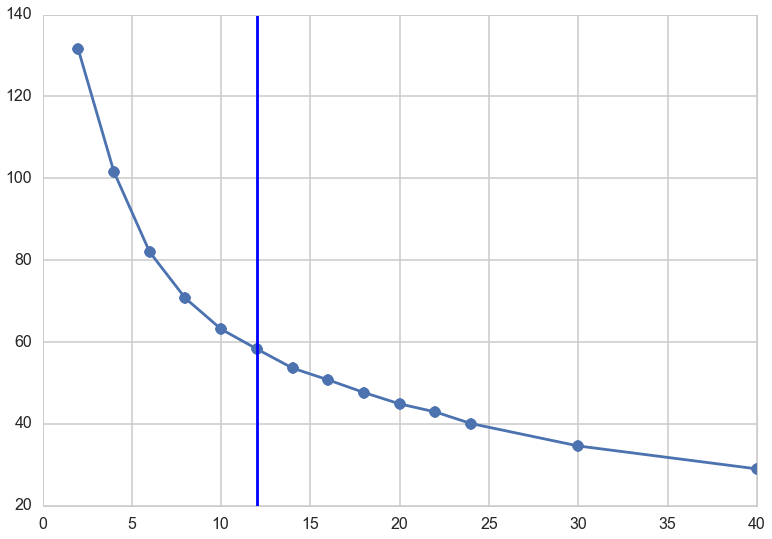

In [112]:
plt.plot(keylist, vallist, 'o-')
plt.axvline(12)

### Gap Statistic Method for Finding K

In [11]:
def bounding_box(X):
    dim=X.shape[1]
    col_names=list(X.columns.values)
    mins={}
    maxes={}
    for i in col_names:
        mins[i]=min(X[i])
        maxes[i]=max(X[i])
    return (mins, maxes)



In [12]:

def ref_dist(X):
    mins, maxes = bounding_box(X)
    refsize = X.shape[0]
    refdictbin={}
    refdictfloat={}
    for i in bin_col_names:
        refdictbin[i]=np.random.randint(0, 2, refsize)
    for i in float_col_names:
        refdictfloat[i]=np.random.uniform(mins[i], maxes[i], refsize)
    bindf=pd.DataFrame(refdictbin)
    floatdf=pd.DataFrame(refdictfloat)
    refdict=pd.concat([bindf, floatdf], axis=1, join_axes=[bindf.index])
    return pd.DataFrame(refdict)
    
    

In [8]:
ref_dist(data).head(20)

Win
 FirstBlood
 firstTower
 firstTowerAssist
 Kills
 Assists
 Deaths
 GoldEarned
 GoldSpent
 TotalDamageDealt
 MagicDamageDealt
 PhysicalDamageDealt
 TotalDamageTaken
 MinionsKilled
 CrowdControl


,CrowdControl,FirstBlood,firstTower,Win,Assists,Deaths,GoldEarned,GoldSpent,Kills,MagicDamageDealt,MinionsKilled,PhysicalDamageDealt,TotalDamageDealt,TotalDamageTaken,firstTowerAssist
0,0,1,0,1,0.608795,0.164365,0.021370,0.239506,0.140607,0.773331,0.703769,0.187126,0.242048,0.562232,0.620246
1,0,1,0,0,0.323738,0.357526,0.317249,0.257558,0.073344,0.397985,0.160790,0.019059,0.126769,0.619655,0.400408
2,0,1,1,1,0.276482,0.152729,0.007077,0.062849,0.676861,0.564469,0.035378,0.325841,0.762039,0.541623,0.316540
3,0,1,0,0,0.949294,0.230965,0.072286,0.322554,0.049760,0.302044,0.299950,0.174026,0.585702,0.511266,0.491356
4,0,0,0,0,0.149584,0.220468,0.012057,0.333698,0.199613,0.133961,0.099769,0.161487,0.824376,0.636649,0.161961
5,1,1,0,0,0.383264,0.425232,0.143053,0.353422,0.048483,0.167104,0.443916,0.142920,0.663077,0.099088,0.434838
6,0,0,0,1,0.161243,0.124446,0.310847,0.049459,0.562582,0.044403,0.175415,0.073692,0.021689,0.370819,0.144182
7,0,0,0,1,0.556923,0.337684,0.130933,0.250554,0.724478,0.142780,0.297682,0.081209,0.075100,0.154380,0.764742
8,1,0,1,1,0.789760,0.187755,0.180279,0.021849,0.153435,0.675323,0.242470,0.153378,0.637097,0.471496,0.698484
9,0,1,0,1,0.718350,0.173823,0.352266,0.208161,0.178267,0.689973,0.383292,0.043638,0.530592,0.048498,0.949277


In [40]:
#https://datasciencelab.wordpress.com/2013/12/27/finding-the-k-in-k-means-clustering/
#https://www.quora.com/How-can-we-choose-a-good-K-for-K-means-clustering   

#run ref_dist B times, use KMeans on each data set generated, average log of the itnertia to get E(log W_t)

#for each reference dataset find intertia and average across B
B=20
def gap(k, X):
    BlogW=[]
    for b in range(B):
        refdat=ref_dist(X)
        Bknn=KMeans(n_clusters=k)
        Bknn.fit(refdat)
        BlogW.append(np.log(Bknn.inertia_))
    knn=KMeans(n_clusters=k)
    knn.fit(X)
    logW=np.log(knn.inertia_)
    gap=np.average(BlogW) - logW
    sd=(np.std(BlogW, ddof=1))*np.sqrt(1+1./B)
    return (gap, sd)
    
    

In [42]:
kp=np.arange(2, 20, 1)
kdict={}
for i in kp:
    gapstat, sd = gap(i, data)
    kdict[i]=(gapstat, gapstat-sd)

In [43]:
kdict

{2: (1.5920539145096981, 1.5809934480167516),
 3: (1.6436355205119417, 1.6311238718672649),
 4: (1.6383541322693631, 1.6218551045865397),
 5: (1.6977007870928205, 1.6901411332318499),
 6: (1.7159977481271236, 1.7033946002883085),
 7: (1.7323483826571842, 1.7214565430997006),
 8: (1.7126380856201582, 1.7006945843165719),
 9: (1.7247633922382084, 1.7131447997534635),
 10: (1.7224647293323265, 1.7111602777701649),
 11: (1.7065628211074815, 1.6925622406329122),
 12: (1.7140488655256583, 1.6990554477040756),
 13: (1.7017798396342085, 1.6928222793958796),
 14: (1.6755377154507354, 1.6618705369187732),
 15: (1.6652621792612896, 1.6551043713848992),
 16: (1.6783586442649141, 1.6490448296819769),
 17: (1.6564889457803993, 1.6410614965869164),
 18: (1.6995862050919968, 1.6862026904282863),
 19: (1.7171800661117915, 1.7057148026334163)}

## PCA for Visualization

In [3]:
from sklearn.decomposition import PCA
pca=PCA(n_components=3)
pca.fit(data)
dnew=pca.transform(data)

#then plot

C:\Users\Andrew\Anaconda\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


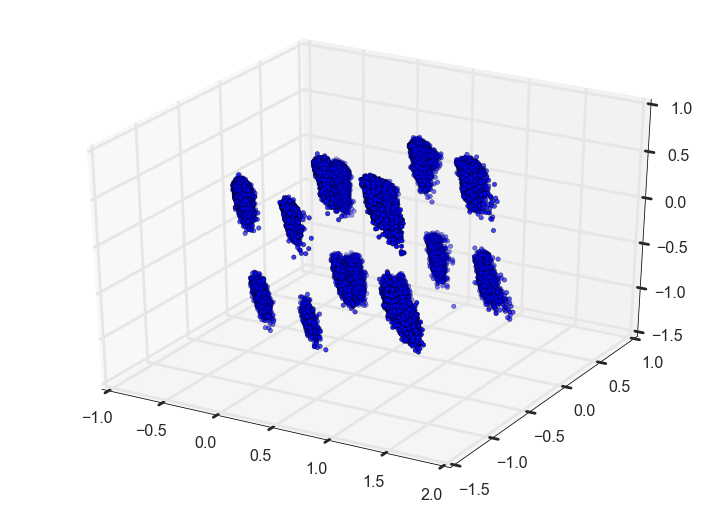

In [4]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

first=[i[0] for i in dnew]
second=[i[1] for i in dnew]
third=[i[2] for i in dnew]

ax.scatter(first, second, third)


In [6]:
pca.explained_variance_ratio_

array([ 0.29667062,  0.21425106,  0.12092407])

# Logistic Regression

In [44]:
"""
Inputs
------
clf : an instance of a scikit-learn classifier
parameters: a parameter grid dictionary thats passed to GridSearchCV (see above)
X: a samples-features matrix in the scikit-learn style
y: the response vectors of 1s and 0s (+ives and -ives)
n_folds: the number of cross-validation folds (default 5)
score_func: a score function we might want to pass (default python None)
   
Returns
-------
The best estimator from the GridSearchCV, after the GridSearchCV has been used to
fit the model.
"""

def cv_optimize(clf, parameters, X, y, n_folds=5, score_func=None):
    if score_func:
        gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds, scoring=score_func)
    else:
        gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds)
    gs.fit(X, y)
    best = gs.best_estimator_
    return best

from sklearn.metrics import confusion_matrix
def do_classify(clf, parameters, indf, featurenames, targetname, target1val, mask=None, reuse_split=None, score_func=None, n_folds=5):
    subdf=indf[featurenames]
    X=subdf.values
    y=(indf[targetname].values==target1val)*1
    if mask !=None:
        print "using mask"
        Xtrain, Xtest, ytrain, ytest = X[mask], X[~mask], y[mask], y[~mask]
    if reuse_split !=None:
        print "using reuse split"
        Xtrain, Xtest, ytrain, ytest = reuse_split['Xtrain'], reuse_split['Xtest'], reuse_split['ytrain'], reuse_split['ytest']
    if parameters:
        clf = cv_optimize(clf, parameters, Xtrain, ytrain, n_folds=n_folds, score_func=score_func)
    clf=clf.fit(Xtrain, ytrain)
    training_accuracy = clf.score(Xtrain, ytrain)
    test_accuracy = clf.score(Xtest, ytest)
    print "############# based on standard predict ################"
    print "Accuracy on training data: %0.2f" % (training_accuracy)
    print "Accuracy on test data:     %0.2f" % (test_accuracy)
    print confusion_matrix(ytest, clf.predict(Xtest))
    print "########################################################"
    return clf, Xtrain, ytrain, Xtest, ytest

In [ ]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(penalty="l1")
clflog, Xt, yt, Xt, yt = do_classify(clf, {'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0] }, dftouse, lcols, u'RESP', 1, reuse_split=reuse_split)